In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [15]:
df = pd.read_csv('u5mr_clean.csv')
df.head()

,CASEID,Respondents current age,Region,Type of place of residence,Highest educational level,Religion,Ethnicity,Number of household members (listed),Wealth index combined,"Type of cooking fuel (smoke exposure, indoor air pollution)",...,Place where most vaccinations were received_missing,Yellow fever vaccine_missing,Given child anything other than breast milk_missing,Visited health facility last 12 months_missing,Getting medical help for self: distance to health facility_missing,Mode of transportation to nearest healthcare facility_missing,Assistance: doctor_missing,Assistance: nurse/midwife/clinical officer_missing,Assistance: traditional birth attendant_missing,Assistance: Relative/friend_missing
0,1 4 2,34.0,1.0,1.0,0.0,7.0,11.0,6,4.0,2.0,...,0,1,0,0,0,0,0,0,0,0
1,1 13 2,39.0,1.0,1.0,2.0,1.0,3.0,8,5.0,2.0,...,1,1,1,0,0,0,1,1,1,1
2,1 26 2,28.0,1.0,1.0,2.0,3.0,3.0,5,4.0,2.0,...,1,1,1,0,0,0,1,1,1,1
3,1 42 1,30.0,1.0,1.0,2.0,4.0,3.0,3,5.0,2.0,...,1,1,1,1,1,1,1,1,1,1
4,1 55 2,34.0,1.0,1.0,2.0,2.0,3.0,4,5.0,2.0,...,0,1,1,1,1,1,0,0,0,0


## EXPLORATORY DATA ANALYSIS

We will proceed with exploratory data analysis, where we will explore the mortality figures in neonates, infants and children aged 1-5 using visualizations.

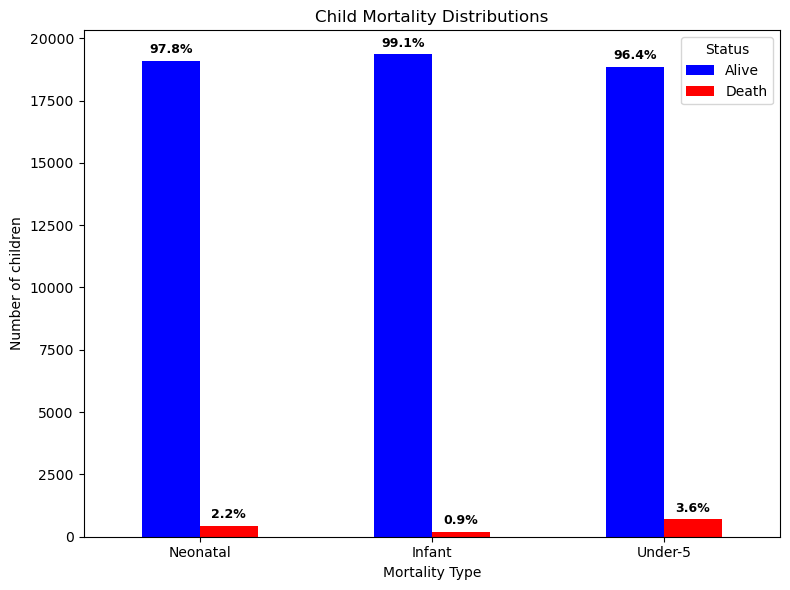

In [16]:
#Plot Child Mortality Distributions
# Prepare data
mortality_cols = {
    "neonatal_mortality": "Neonatal",
    "infant_mortality": "Infant",
    "under5_mortality": "Under-5"
}

counts = pd.DataFrame({
    label: df[col].value_counts().sort_index()
    for col, label in mortality_cols.items()
}).T

# Ensure Alive=0, Death=1 order
counts = counts[[0, 1]]
counts.columns = ["Alive", "Death"]

# Plot grouped bar chart
ax = counts.plot(
    kind="bar",
    stacked=False,
    color=["blue", "red"],
    figsize=(8, 6)
)

# Add percentage labels correctly using bar containers
for container in ax.containers:
    # Get group total per mortality type
    for bar in container:
        height = bar.get_height()
        if height > 0:
            # Total of the group (Alive+Death)
            total = counts.loc[bar.get_x() + bar.get_width()/2, :].sum() if False else None
        # Better way: use index position
    for i, bar in enumerate(container):
        height = bar.get_height()
        if height > 0:
            total = counts.iloc[i].sum()
            pct = height / total * 100
            ax.text(
                bar.get_x() + bar.get_width()/2,
                height + total * 0.01,
                f"{pct:.1f}%",
                ha='center', va='bottom',
                fontsize=9, fontweight="bold"
            )

plt.ylabel("Number of children")
plt.xlabel("Mortality Type")
plt.title("Child Mortality Distributions")
plt.xticks(rotation=0)
plt.legend(title="Status")
plt.tight_layout()
plt.show()

As can be seen in the bar chart above, the highest mortality rate is in the under 5 group, with a mortality rate of 3.6%, followed by neonates at 2.2% and 0.9% in the infants.

c:\Users\admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


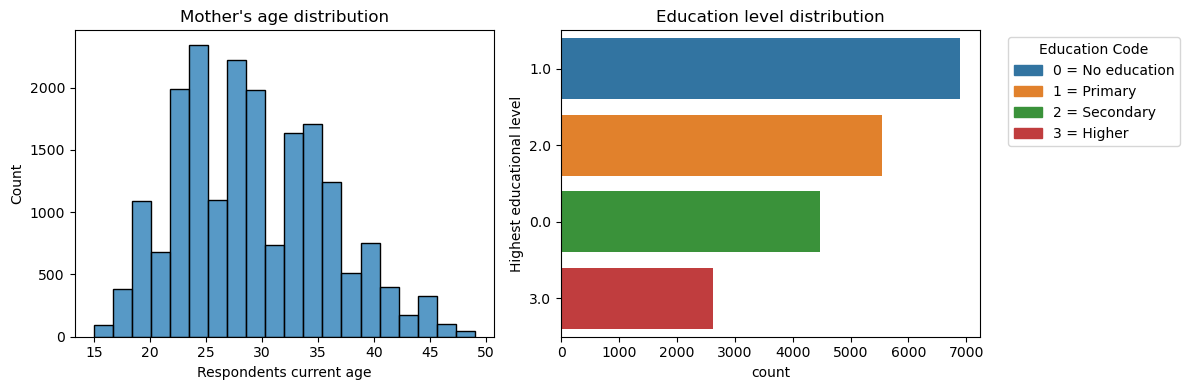

In [17]:

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Age distribution
sns.histplot(df['Respondents current age'], bins=20, ax=axes[0], kde=False)
axes[0].set_title("Mother's age distribution")

# Education distribution
order = df['Highest educational level'].value_counts().index
barplot = sns.countplot(
    y='Highest educational level',
    data=df,
    order=order,
    ax=axes[1]
)
axes[1].set_title("Education level distribution")


# Custom legend with actual bar colors
legend_labels = {
    0: "No education",
    1: "Primary",
    2: "Secondary",
    3: "Higher"
}

# Get bar colors from the plot
colors = [p.get_facecolor() for p in barplot.patches]

# Create patches with matching colors
patches = [
    mpatches.Patch(color=colors[i], label=f"{code} = {label}")
    for i, (code, label) in enumerate(legend_labels.items())
]

axes[1].legend(handles=patches, title="Education Code", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


The visualization on the left shows the distribution of ages of the respondents. Most respondents are located between ages 22-35.
On the right, most respondents (35.3%) have an education level of primary school, followed by secondary school(28.4%), then no education(22.9%) and lastly tertiary education(13.5%).

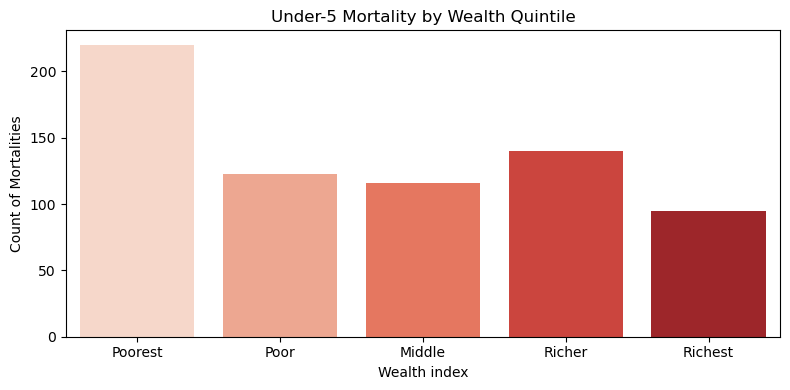

In [33]:
# Filter mortalities and make a safe copy
mortality_df = df[df['under5_mortality'] == 1].copy()

# Map numeric codes to readable labels
label_map = {1: "Poorest", 2: "Poor", 3: "Middle", 4: "Richer", 5: "Richest"}
mortality_df['Wealth_label'] = mortality_df['Wealth index combined'].map(label_map)

# Define desired order (so bars appear Poorest -> Richest)
order = [label_map[i] for i in sorted(label_map.keys())]

plt.figure(figsize=(8,4))
sns.countplot(x='Wealth_label', data=mortality_df, order=order, palette="Reds")
plt.title("Under-5 Mortality by Wealth Quintile")
plt.xlabel("Wealth index")
plt.ylabel("Count of Mortalities")
plt.tight_layout()
plt.show()


In the above chart, we can see that the highest mortality rate is in the 'poorest'(1) category, followed by the 'richer'(4) category, then the 'poor'(2) category, then the 'middle'(3) category and lastly the 'richest'(5) category. Interestingly enough, the 'richer'(4) category had the second-highest number of mortalities.

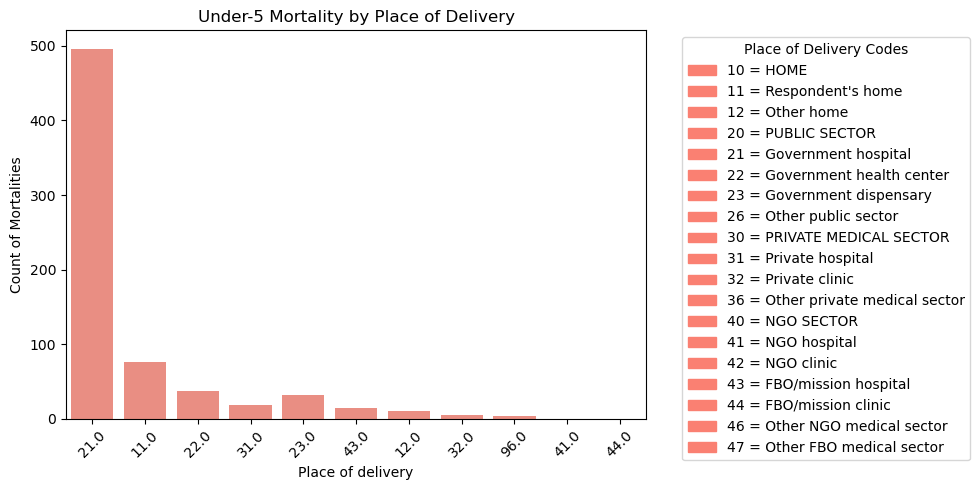

In [37]:
# Filter only mortalities
mortality_df = df[df['under5_mortality'] == 1].copy()

# Mapping of codes to labels
place_labels = {
    10: "HOME",
    11: "Respondent's home",
    12: "Other home",
    20: "PUBLIC SECTOR",
    21: "Government hospital",
    22: "Government health center",
    23: "Government dispensary",
    26: "Other public sector",
    30: "PRIVATE MEDICAL SECTOR",
    31: "Private hospital",
    32: "Private clinic",
    36: "Other private medical sector",
    40: "NGO SECTOR",
    41: "NGO hospital",
    42: "NGO clinic",
    43: "FBO/mission hospital",
    44: "FBO/mission clinic",
    46: "Other NGO medical sector",
    47: "Other FBO medical sector"
}

plt.figure(figsize=(10,5))
ax = sns.countplot(
    x='Place of delivery',
    data=mortality_df,
    order=df['Place of delivery'].value_counts().index,
    color="salmon"
)

plt.title("Under-5 Mortality by Place of Delivery")
plt.xticks(rotation=45)
plt.ylabel("Count of Mortalities")
plt.xlabel("Place of delivery")

# --- Build legend patches ---
patches = [
    mpatches.Patch(color="salmon", label=f"{code} = {label}")
    for code, label in place_labels.items()
]

plt.legend(
    handles=patches,
    title="Place of Delivery Codes",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()


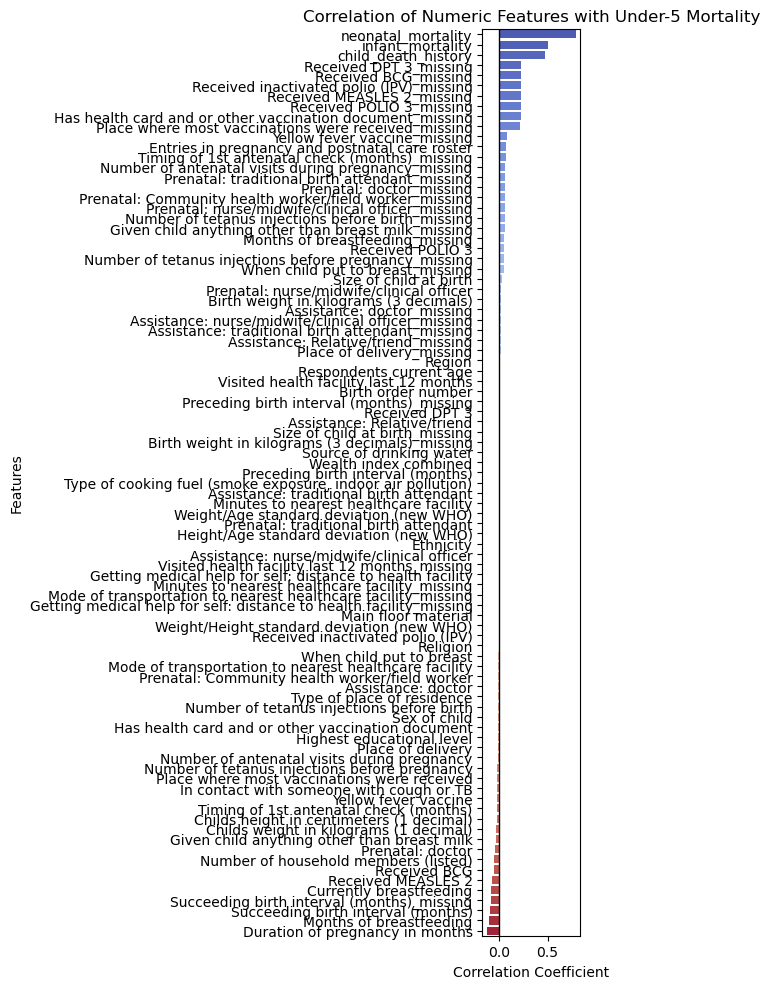

neonatal_mortality                            0.788167
infant_mortality                              0.502470
child_death_history                           0.468903
Received DPT 3_missing                        0.225937
Received BCG_missing                          0.225937
                                                ...   
Currently breastfeeding                      -0.086098
Succeeding birth interval (months)_missing   -0.086202
Succeeding birth interval (months)           -0.087145
Months of breastfeeding                      -0.102877
Duration of pregnancy in months              -0.124319
Name: under5_mortality, Length: 89, dtype: float64


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Select numeric columns ---
numeric_cols = df.select_dtypes(include=['float64','int64']).columns

# --- Compute correlation with under5_mortality only ---
corr_under5 = (
    df[numeric_cols]
    .corr()['under5_mortality']          # correlation of every numeric col with target
    .drop('under5_mortality')            # drop self-correlation
    .sort_values(ascending=False)        # sort descending
)

# --- Plot ---
plt.figure(figsize=(6,10))
sns.barplot(x=corr_under5.values, y=corr_under5.index, palette="coolwarm")
plt.title("Correlation of Numeric Features with Under-5 Mortality")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.axvline(0, color='black', linewidth=1)
plt.tight_layout()
plt.show()

# Optional: print the correlations
print(corr_under5)